In [1]:
#K-Nearest Neiaghbours

In [53]:
import pandas as pd
import numpy as np
import os
df=pd.read_csv("zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [55]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [56]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [57]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [58]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

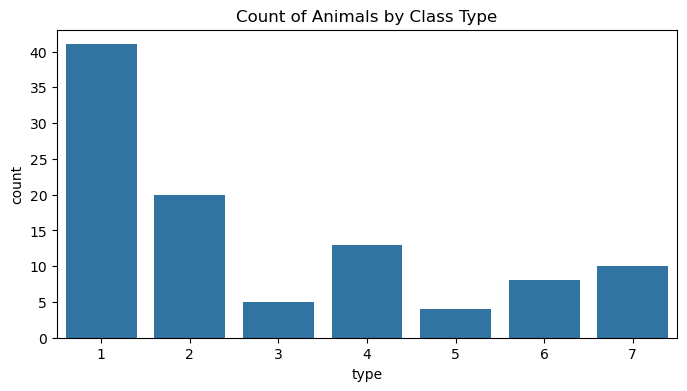

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='type', data=df)
plt.title('Count of Animals by Class Type')
plt.show()

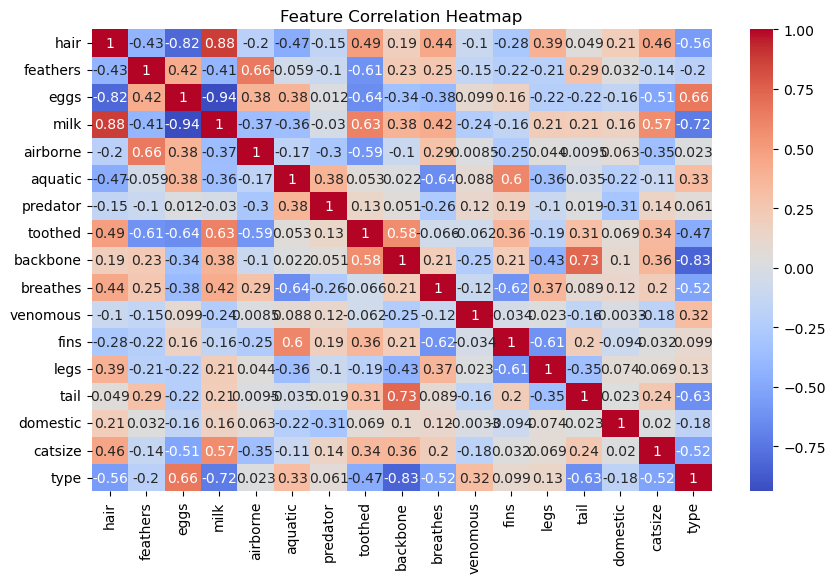

In [60]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


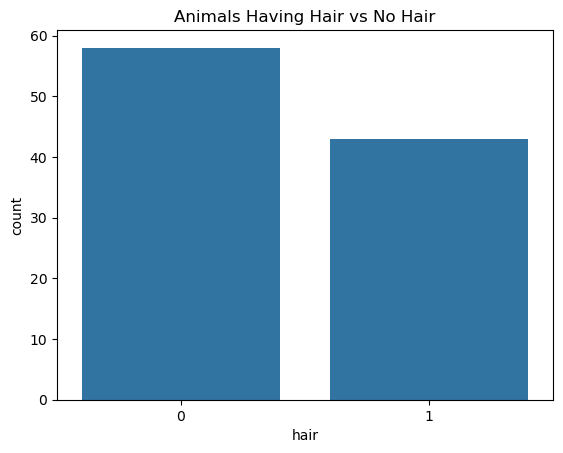

In [61]:
sns.countplot(x='hair', data=df)
plt.title('Animals Having Hair vs No Hair')
plt.show()

In [62]:
#2

In [63]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [64]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [65]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap the outliers
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [66]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.0,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.0,101.0,101.0,101.0,101.000000,101.000000,101.0,101.000000,101.000000
mean,0.425743,0.0,0.584158,0.405941,0.0,0.356436,0.554455,0.603960,1.0,1.0,0.0,0.0,2.821782,0.742574,0.0,0.435644,2.831683
std,0.496921,0.0,0.495325,0.493522,0.0,0.481335,0.499505,0.491512,0.0,0.0,0.0,0.0,1.986938,0.439397,0.0,0.498314,2.102709
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.0,2.000000,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,0.000000,2.000000
75%,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,4.000000,1.000000,0.0,1.000000,4.000000
max,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.0,0.0,0.0,7.000000,1.000000,0.0,1.000000,7.000000


In [67]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [68]:
#3.

In [69]:
from sklearn.model_selection import train_test_split
X = df.drop(['animal name', 'type'], axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (80, 16)
X_test: (21, 16)
y_train: (80,)
y_test: (21,)


In [70]:
#4

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [72]:
knn_2d = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_2d.fit(X_plot, y_plot)


KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Test Accuracy:", acc)
print("Test Precision:", prec)
print("Test Recall:", rec)
print("Test F1-score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Test Accuracy: 0.9047619047619048
Test Precision: 0.6571428571428571
Test Recall: 0.7142857142857143
Test F1-score: 0.6785714285714286

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00         4
         3.0       0.00      0.00      0.00         1
         4.0       0.60      1.00      0.75         3
         5.0       0.00      0.00      0.00         1
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.66      0.71      0.68        21
weighted avg       0.85      0.90      0.87        21



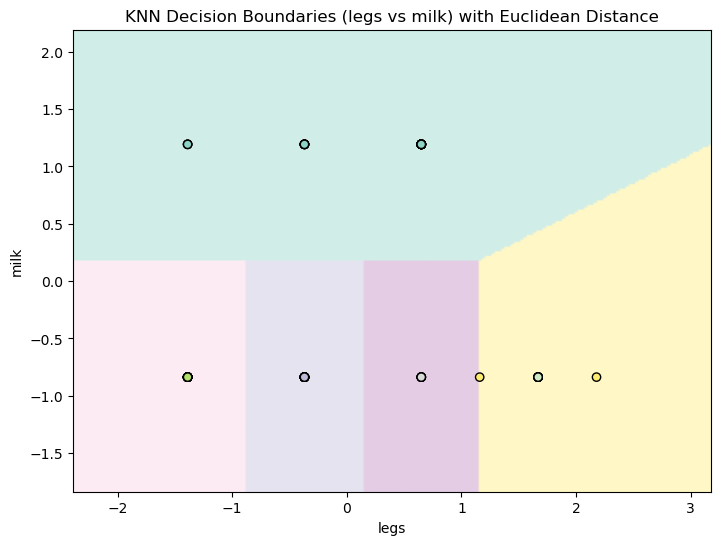

In [74]:
feature1 = 'legs'
feature2 = 'milk'

X_plot = X_train_scaled[:, [X.columns.get_loc(feature1), X.columns.get_loc(feature2)]]
y_plot = y_train

# Train KNN (Euclidean distance)
knn_2d = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn_2d.fit(X_plot, y_plot)

x_values = np.linspace(X_plot[:,0].min()-1, X_plot[:,0].max()+1, 200)
y_values = np.linspace(X_plot[:,1].min()-1, X_plot[:,1].max()+1, 200)

# Create all combinations of points
grid_points = np.array([[x, y] for x in x_values for y in y_values])

# Predict class for each grid point
Z = knn_2d.predict(grid_points)
Z = Z.reshape(len(x_values), len(y_values))  

plt.figure(figsize=(10,6))
plt.imshow(Z.T, origin='lower', extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
           alpha=0.4, cmap=plt.cm.Set3)
plt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot, cmap=plt.cm.Set3, edgecolor='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'KNN Decision Boundaries ({feature1} vs {feature2}) with Euclidean Distance')
plt.show()

In [75]:
#Interview Answers

In [46]:
#1.KNN hyperparameters:
#n_neighbors – Number of neighbors to consider. Small → sensitive/overfit, Large → smooth/underfit.
#metric – How distance is measured. Common: 'euclidean' (numeric), 'manhattan' (binary).
#weights – Influence of neighbors: 'uniform' (all equal) or 'distance' (closer counts more).
#algorithm – How neighbors are searched  affects speed.
#p – Only for 'minkowski' metric: 1=Manhattan, 2=Euclidean.

In [47]:
#Distance metrics used in KNN:
#Euclidean – Straight-line distance, good for numeric features.
#Manhattan – Sum of absolute differences, good for binary/categorical features.
#Minkowski – General form; p=1 → Manhattan, p=2 → Euclidean.
#Chebyshev – Maximum difference in any feature.
#Hamming – Counts differences, ideal for binary features.